In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Gender Distribution Among Different Majors and Minors

**Question:** What is the gender distribution among different majors and minors at Union College? Are there any majors or minors that are predominantly chosen by one gender over the other?

**Visualization Approach:** Create a grouped bar chart to show the gender distribution within each major and minor

###Gender Distribution by Major

In [ ]:
def read_csv_to_dataframe_major(filename):
    """
    Reads a CSV file into a Pandas DataFrame.

    Args:
    filename (str): The path to the CSV file.

    Returns:
    DataFrame: The DataFrame containing the data from the CSV file.
    """
    headers = []
    data = []

    with open(filename, 'r') as file:
        csv_reader = csv.DictReader(file)

        headers = csv_reader.fieldnames
        while headers[0] == '':
            headers.pop(0)
        headers.insert(0, 'Division')
        headers.insert(1, 'Major')

        for row in csv_reader:
            data.append(row)

    df = pd.DataFrame(data, columns=headers)

    return df

In [ ]:
def preprocess_data_major(df):
    """
    Preprocesses the DataFrame by removing unnecessary rows and columns.

    Args:
    df (DataFrame): The DataFrame to be preprocessed.

    Returns:
    DataFrame: The preprocessed DataFrame.
    """
    df = df[~df['Division'].str.contains('Double Major|ID Major|Grand Total')]

    return df

In [ ]:
def merge_dataframes_major(male, female):
    """
    Merges male and female DataFrames.

    Args:
    male (DataFrame): DataFrame containing male enrollment data.
    female (DataFrame): DataFrame containing female enrollment data.

    Returns:
    Merged DataFrame.
    """
    df_major_male.set_index('Major', inplace=True)
    df_major_female.set_index('Major', inplace=True)

    df_merged = pd.merge(df_major_male[['24/SP']], df_major_female[['24/SP']], left_index=True, right_index=True, how='outer', suffixes=('_male', '_female'))

    majors_to_remove = ['Liberal Arts-Humanities (Undecided)', 'Liberal Arts-Sciences (Undecided)', 'Liberal Arts-Social Sciences (Undecided)']
    df_merged = df_merged[~df_merged.index.isin(majors_to_remove)]

    df_merged.fillna(0, inplace=True)
    df_merged.replace('', 0, inplace=True)
    df_merged.rename(columns={'24/SP_male': 'Male', '24/SP_female': 'Female'}, inplace=True)

    df_merged.reset_index(inplace=True)
    df_merged.set_index('Major', inplace=True)

    return df_merged[['Male', 'Female']]

In [ ]:
def plot_gender_distribution_major(df):
    """
    Plots gender distribution by major.

    Args:
    df (DataFrame): DataFrame containing gender distribution data.
    """
    df['Male'] = df['Male'].astype(int)
    df['Female'] = df['Female'].astype(int)

    total_counts = df['Male'] + df['Female']

    df_sorted = df.assign(Total=total_counts).sort_values('Total', ascending=False)

    y = np.arange(len(df_sorted)) * 1.75
    width = 0.6

    fig, ax = plt.subplots(figsize=(17, 30))
    bar1 = ax.barh(y - width/2, df_sorted['Male'], width, label='Male', color='lightblue', edgecolor='black')
    bar2 = ax.barh(y + width/2, df_sorted['Female'], width, label='Female', color='lightcoral', edgecolor='black', hatch='/')

    ax.set_ylabel('Major', fontsize=12)
    ax.set_xlabel('Counts', fontsize=12)
    ax.set_title('Gender Distribution by Major at Union College (2024)', fontsize=14)
    ax.set_yticks(y)
    ax.set_yticklabels(df_sorted.index, fontsize=10)

    specified_majors = ['Environmental Science', 'Computer Engineering', 'Managerial Economics', 'Neuroscience', 'Computer Science', 'Biology', 'Economics', 'Mechanical Engineering']

    '''color_map = {}
    for i in range(len(df_sorted)):
        major = df_sorted.index[i]
        if major in specified_majors:
            if df_sorted['Male'].iloc[i] > df_sorted['Female'].iloc[i]:
                color_map[major] = 'lightblue'
            else:
                color_map[major] = 'lightcoral'
        else:
            color_map[major] = 'black'

    yticklabels = ax.get_yticklabels()

    for i, label in enumerate(yticklabels):
        label.set_color(color_map[df_sorted.index[i]])'''

    for bar in bar1:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=10, color='lightblue')

    for bar in bar2:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=10, color='lightcoral')

    legend_elements = [Patch(facecolor='lightcoral', edgecolor='black', hatch='/', label='Female'), Patch(facecolor='lightblue', edgecolor='black', label='Male')]
    legend = ax.legend(handles=legend_elements)
    plt.setp(legend.get_texts(), fontsize=14)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(axis='x', linestyle=':', linewidth='0.5', color='gray')

    ax.set_ylim(-0.5, max(y) + 0.5)
    ax.set_xlim(left=0)

    fig.tight_layout()

    plt.savefig('gender_distribution_major.pdf')
    plt.show()

In [ ]:
enroll_by_major = '/content/drive/My Drive/Colab Notebooks/Data/EnrollmentbyMajor.csv'
enroll_by_major_male = '/content/drive/My Drive/Colab Notebooks/Data/EnrollmentbyMajor(Male).csv'
enroll_by_major_female = '/content/drive/My Drive/Colab Notebooks/Data/EnrollmentbyMajor(Female).csv'

In [ ]:
df_major_total = read_csv_to_dataframe_major(enroll_by_major)
df_major_male = read_csv_to_dataframe_major(enroll_by_major_male)
df_major_female = read_csv_to_dataframe_major(enroll_by_major_female)

In [ ]:
df_major_total = preprocess_data_major(df_major_total)
df_major_male = preprocess_data_major(df_major_male)
df_major_female = preprocess_data_major(df_major_female)

In [ ]:
df_merged = merge_dataframes_major(df_major_male, df_major_female)
df_merged = df_merged[df_merged.index != 'Environmental Science']
df_merged.loc['Environmental Science'] = [9, 24]

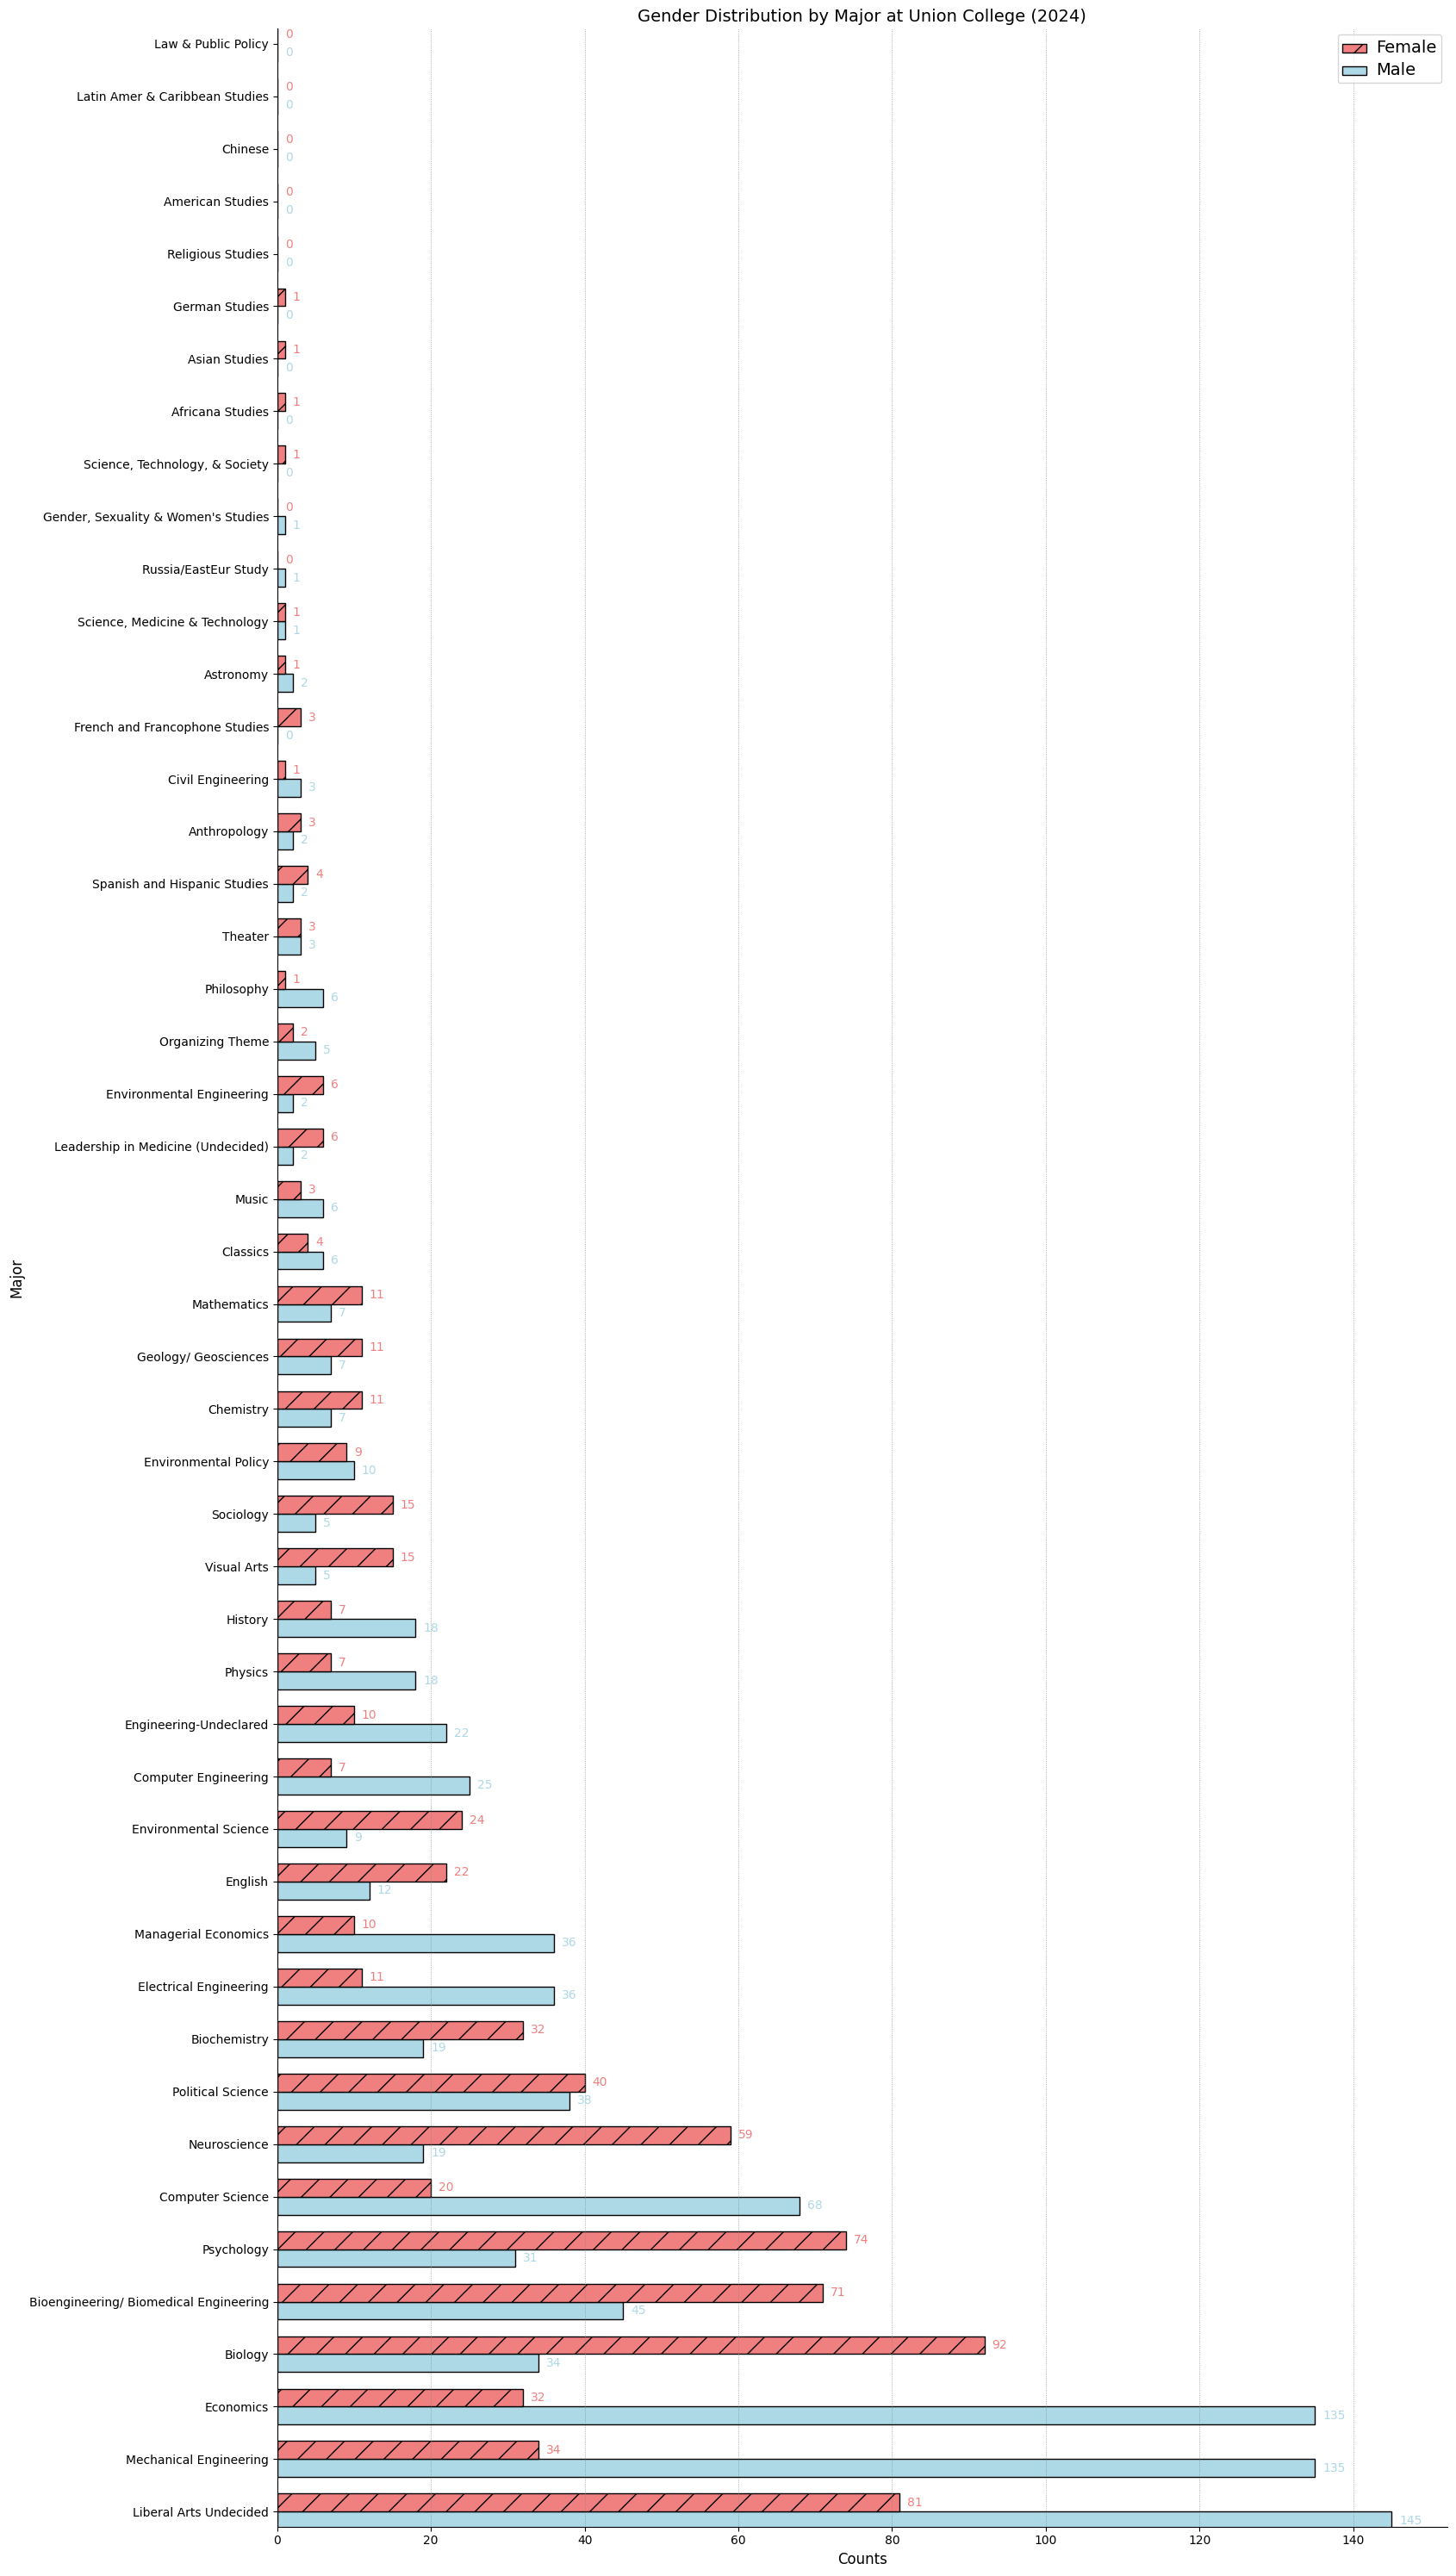

In [ ]:
plot_gender_distribution_major(df_merged)

### Gender Distribution by Minor

In [ ]:
def read_csv_to_dataframe_minor(filename):
    """
    Reads a CSV file into a Pandas DataFrame.

    Args:
    filename (str): The path to the CSV file.

    Returns:
    DataFrame: The DataFrame containing the data from the CSV file.
    """
    headers = []
    data = []

    with open(filename, 'r') as file:
        csv_reader = csv.DictReader(file)

        headers = csv_reader.fieldnames
        while headers[0] == '':
            headers.pop(0)
        headers.insert(0, 'Minor')

        if 'Grand Total' in headers:
            headers.remove('Grand Total')

        for row in csv_reader:
          data.append(row)

    df = pd.DataFrame(data, columns=headers)
    return df

In [ ]:
def preprocess_data_minor(df):
    """
    Preprocesses the DataFrame by removing unnecessary rows and columns.

    Args:
    df (DataFrame): The DataFrame to be preprocessed.

    Returns:
    DataFrame: The preprocessed DataFrame.
    """
    df = df[~df['Minor'].str.contains('Grand Total')]
    df = df[df['Minor'].str.strip() != '']
    return df

In [ ]:
def merge_dataframes_minor(male, female):
    """
    Merges male and female DataFrames.

    Args:
    df_male (DataFrame): DataFrame containing male enrollment data.
    df_female (DataFrame): DataFrame containing female enrollment data.

    Returns:
    DataFrame: Merged DataFrame.
    """
    male.set_index('Minor', inplace=True)
    female.set_index('Minor', inplace=True)

    df_merged = pd.merge(male[['24/SP']], female[['24/SP']], left_index=True, right_index=True, how='outer', suffixes=('_male', '_female'))

    to_remove = ['Grand Total']
    df_merged = df_merged[~df_merged.index.isin(to_remove)]
    df_merged.fillna(0, inplace=True)
    df_merged.replace('', 0, inplace=True)
    df_merged.rename(columns={'24/SP_male': 'Male', '24/SP_female': 'Female'}, inplace=True)

    return df_merged[['Male', 'Female']]


In [ ]:
def plot_gender_distribution_minor(df):
    """
    Plots gender distribution by minor.

    Args:
    df (DataFrame): DataFrame containing gender distribution data.
    """
    df['Male'] = df['Male'].astype(int)
    df['Female'] = df['Female'].astype(int)

    total_counts = df['Male'] + df['Female']

    df_sorted = df.assign(Total=total_counts).sort_values('Total', ascending=False)

    y = np.arange(len(df_sorted)) * 1.75
    width = 0.7

    fig, ax = plt.subplots(figsize=(15, 28))
    bar1 = ax.barh(y - width/2, df_sorted['Male'], width, label='Male', color='lightblue', edgecolor='black')
    bar2 = ax.barh(y + width/2, df_sorted['Female'], width, label='Female', color='lightcoral', edgecolor='black', hatch='/')

    ax.set_ylabel('Minor', fontsize=12)
    ax.set_xlabel('Counts', fontsize=12)
    ax.set_title('Gender Distribution by Minor at Union College (2024)', fontsize=14)
    ax.set_yticks(y)
    ax.set_yticklabels(df_sorted.index, fontsize=10)

    for bar in bar1:
        width = bar.get_width()
        ax.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=10, color='lightblue')

    for bar in bar2:
        width = bar.get_width()
        ax.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=10, color='lightcoral')

    legend_elements = [Patch(facecolor='lightcoral', edgecolor='black', hatch='/', label='Female'), Patch(facecolor='lightblue', edgecolor='black', label='Male')]
    legend = ax.legend(handles=legend_elements)
    plt.setp(legend.get_texts(), fontsize=14)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(axis='x', linestyle=':', linewidth='0.5', color='gray')

    ax.set_ylim(-0.5, max(y) + 0.5)
    ax.set_xlim(left=0)

    fig.tight_layout()

    plt.savefig('gender_distribution_minor.pdf')
    plt.show()

In [ ]:
enroll_by_minor = '/content/drive/My Drive/Colab Notebooks/Data/EnrollmentbyMinor.csv'
enroll_by_minor_male = '/content/drive/My Drive/Colab Notebooks/Data/EnrollmentbyMinor(Male).csv'
enroll_by_minor_female = '/content/drive/My Drive/Colab Notebooks/Data/EnrollmentbyMinor(Female).csv'

In [ ]:
df_minor_total = read_csv_to_dataframe_minor(enroll_by_minor)
df_minor_male = read_csv_to_dataframe_minor(enroll_by_minor_male)
df_minor_female = read_csv_to_dataframe_minor(enroll_by_minor_female)

In [ ]:
df_minor_total = preprocess_data_minor(df_minor_total)
df_minor_male = preprocess_data_minor(df_minor_male)
df_minor_female = preprocess_data_minor(df_minor_female)

In [ ]:
df_merged = merge_dataframes_minor(df_minor_male, df_minor_female)

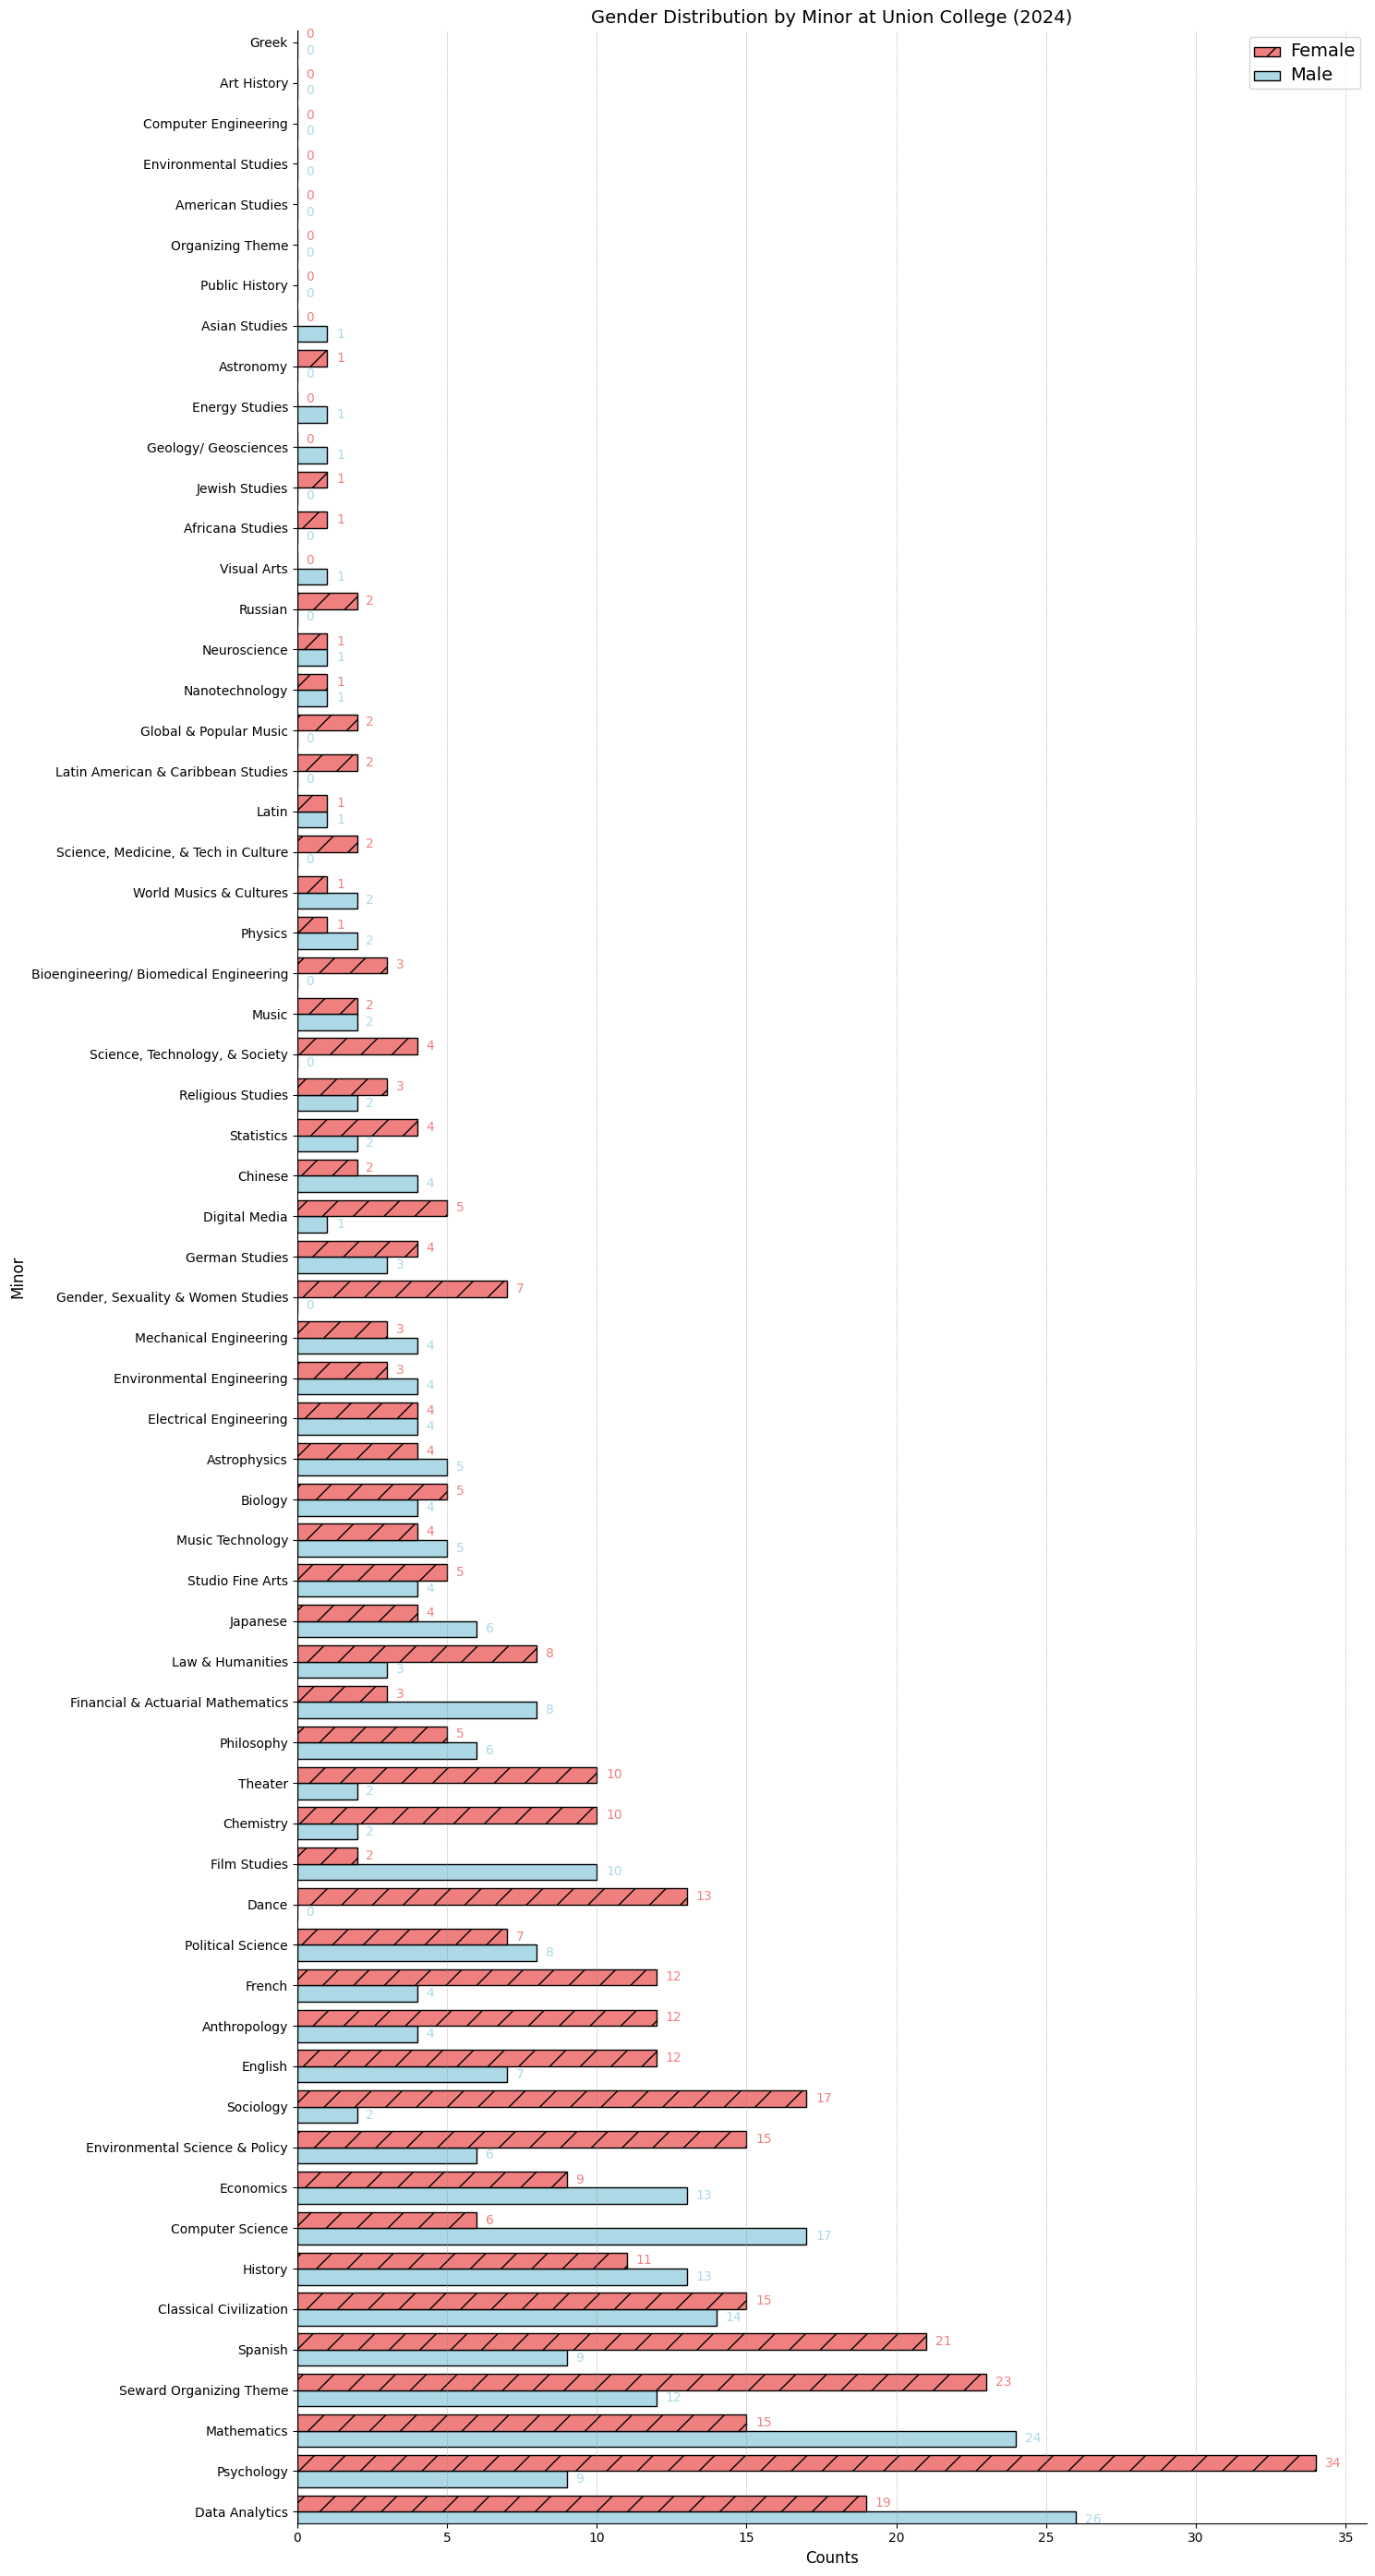

In [ ]:
plot_gender_distribution_minor(df_merged)

#(EXTRA) Gender Distribution Among Different Class Levels

**Question:** What is the gender distribution of full-time and part-time students across different class levels at Union College?

**Visualization Approach:** Create a grouped bar chart to show the gender distribution across different class levels at Union College

In [ ]:
def read_csv_to_dataframe_class_level(filename):
    """
    Reads a CSV file into a Pandas DataFrame.

    Args:
    filename (str): The path to the CSV file.

    Returns:
    DataFrame: The DataFrame containing the data from the CSV file.
    """
    headers = []
    data = []

    with open(filename, 'r') as file:
        csv_reader = csv.DictReader(file)

        headers = csv_reader.fieldnames

        for row in csv_reader:
            data.append(row)

    df = pd.DataFrame(data, columns=headers)
    return df

In [ ]:
def preprocess_data_class_level(df):
    """
    Preprocesses the DataFrame by removing unnecessary columns.

    Args:
    df (DataFrame): The DataFrame to be preprocessed.

    Returns:
    DataFrame: The preprocessed DataFrame.
    """
    df.drop(columns=['FTE', 'Total Headcount'], inplace=True)
    return df

In [ ]:
def plot_gender_distribution_class_level(df):
    """
    Plots gender distribution by class level.

    Args:
    df (DataFrame): DataFrame containing gender distribution data.
    """
    numeric_cols = df.columns[1:]
    df.loc[:, numeric_cols] = df.loc[:, numeric_cols].apply(pd.to_numeric)

    class_levels = df['Class Level']
    full_time_males = df['Male Full-Time']
    full_time_females = df['Female Full-Time']

    colors = ['lightblue', 'lightcoral']
    pattern = '/'

    x = np.arange(len(class_levels))
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(12, 8))

    for i, (male, female) in enumerate(zip(full_time_males, full_time_females)):
        ax.bar(x[i] - bar_width/2, male, bar_width, color=colors[0], edgecolor='black', label='Male' if i == 0 else None)
        ax.bar(x[i] + bar_width/2, female, bar_width, color=colors[1], edgecolor='black', hatch=pattern, label='Female' if i == 0 else None)
        ax.text(x[i] - bar_width/2, male, str(male), ha='center', va='bottom', fontsize=10)
        ax.text(x[i] + bar_width/2, female, str(female), ha='center', va='bottom', fontsize=10)

    ax.set_xlabel('Class Level')
    ax.set_ylabel('Number of Students')
    ax.set_title('Gender Distribution of Full-Time Students at Union College by Class Level')
    ax.set_xticks(x)
    ax.set_xticklabels(class_levels, rotation=45, ha='right')

    ax.legend(title='Gender')

    plt.tight_layout()

    plt.savefig('gender_distribution_class_level.pdf')
    plt.close()

In [ ]:
summary_by_class_lvl = '/content/drive/My Drive/Colab Notebooks/Data/EnrollmentSummarybyClassLevel.csv'

In [ ]:
df_class_level = read_csv_to_dataframe_class_level(summary_by_class_lvl)

In [ ]:
df_class_level = preprocess_data_class_level(df_class_level)

In [ ]:
plot_gender_distribution_class_level(df_class_level)